In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format


## EDA (EXPLORARY DATA ANALYSIS)

### STEP 1 - Import and Inspect Data

In [2]:
df = pd.read_csv("../../datasets/online_retail.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [5]:
df.shape

(1067371, 8)

In [6]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

### STEP 2 - Handling Missing Values

In [7]:
df = df[df["Customer ID"].notna()]
df["Customer ID"] = df["Customer ID"].astype(int)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


### STEP 3 - Explore Data Characteristics & Transformations

In [8]:
df = df[df["Price"] > 0]
df = df[df["Quantity"] > 0]

df["Total Price"] = df["Price"] * df["Quantity"]
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011,12


### STEP 4 - Handling Outliers

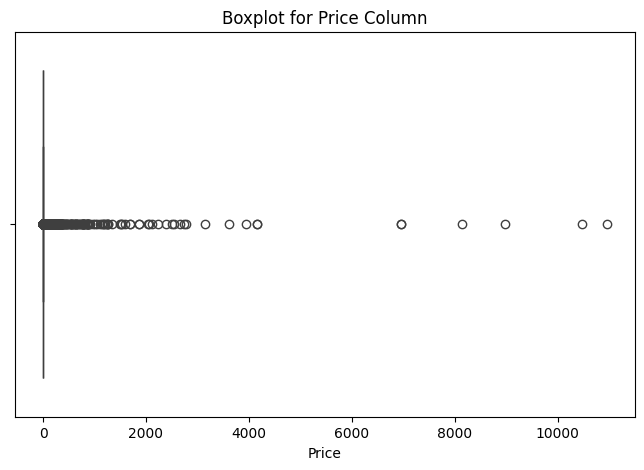

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'])
plt.title('Boxplot for Price Column')
plt.show()

In [10]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iqr_mask = (df["Price"] >= lower) & (df["Price"] <= upper)
df = df[iqr_mask]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12


### STEP 5 - Visualizing Data Relationships

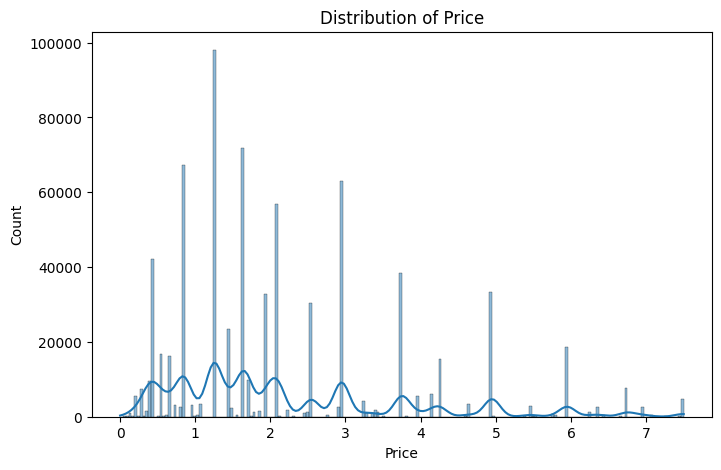

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

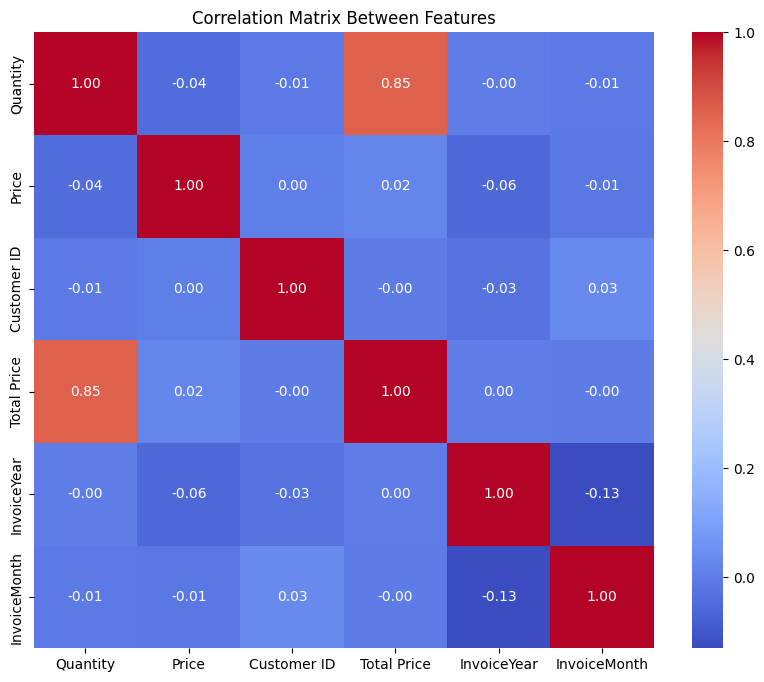

In [12]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True, # Show the correlation values on the heatmap
    cmap='coolwarm',
    fmt=".2f" # Format annotation to two decimal places
)
plt.title('Correlation Matrix Between Features')
plt.show()

## ANALYSIS

### Sales Over Time (Daily)

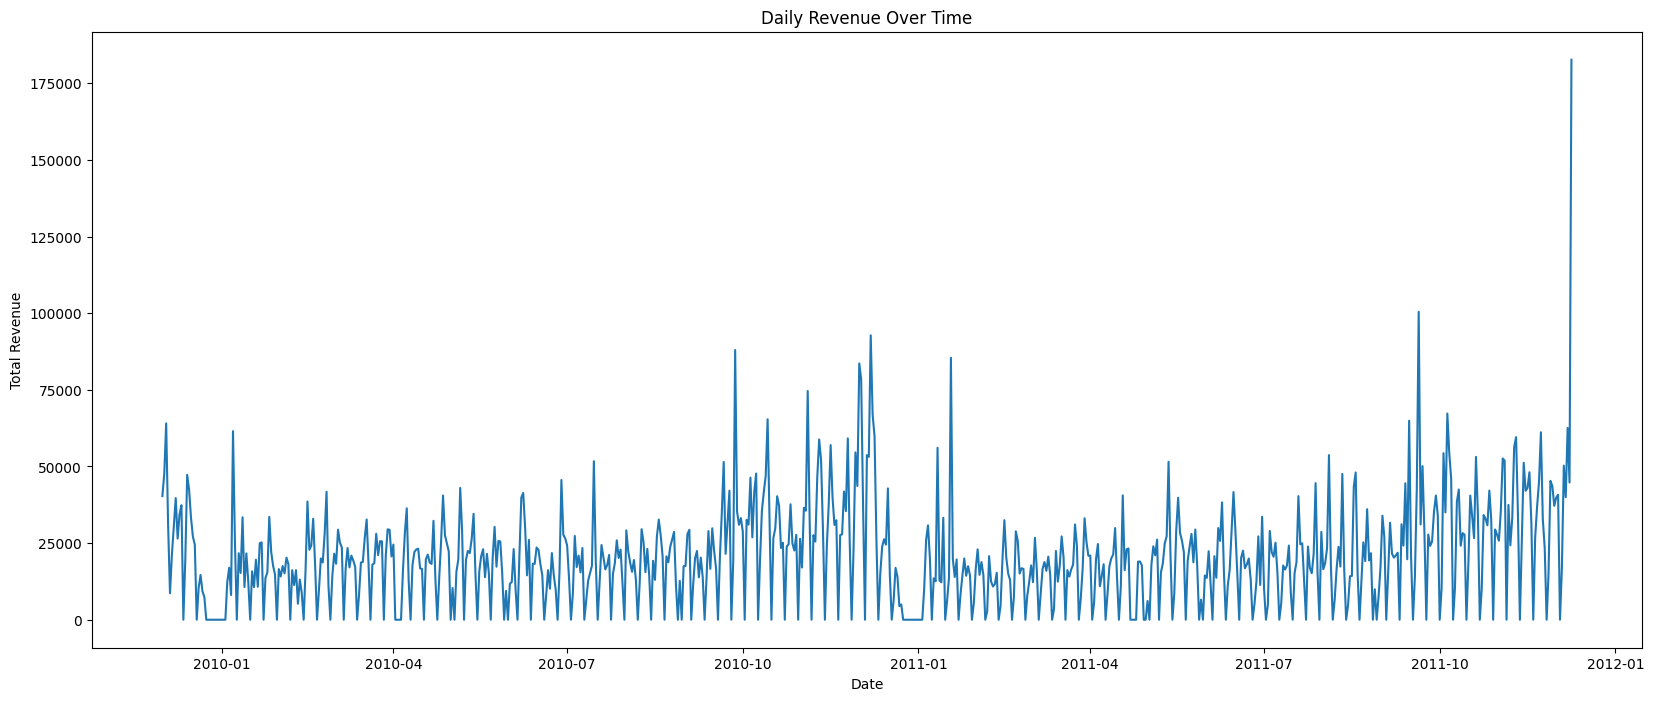

In [13]:
daily_revenue = (
    df
    .set_index("InvoiceDate")
    .resample("D")["Total Price"]
    .sum()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(daily_revenue["InvoiceDate"], daily_revenue["Total Price"])

ax.set_title("Daily Revenue Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Total Revenue")

plt.show()

### Weekly & Monthly Revenue

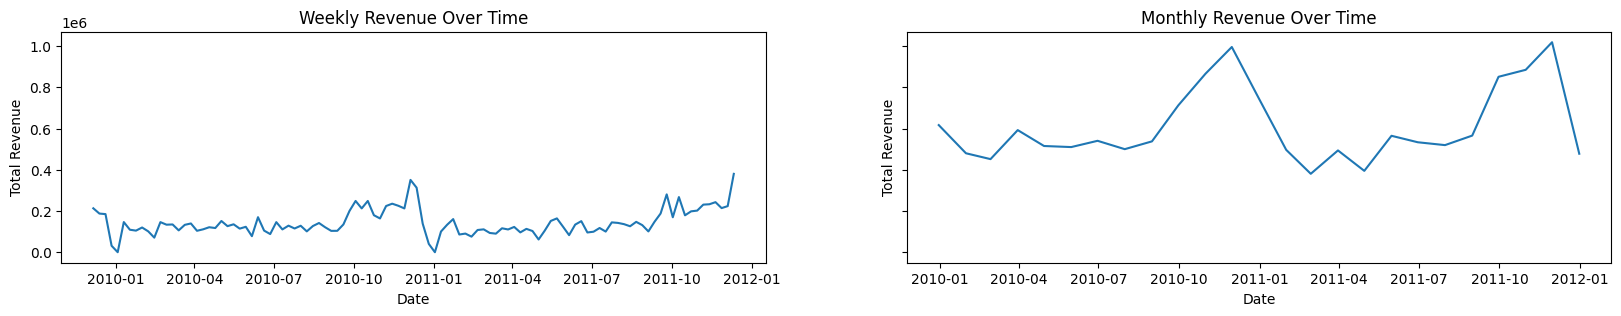

In [14]:
weekly_revenue = (
    df.set_index("InvoiceDate")
    .resample("W")["Total Price"]
    .sum()
    .reset_index()
)

monthly_revenue = (
    df.set_index("InvoiceDate")
    .resample("ME")["Total Price"]
    .sum()
    .reset_index()
)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 3), sharey=True)

ax1.plot(weekly_revenue["InvoiceDate"], weekly_revenue["Total Price"])
ax1.set_title("Weekly Revenue Over Time")
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Revenue')

ax2.plot(monthly_revenue["InvoiceDate"], monthly_revenue["Total Price"])
ax2.set_title("Monthly Revenue Over Time")
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Revenue')

plt.show()

### Activity by Time

/var/folders/cq/vjb_s2d976bglxdj00ks1jpc0000gn/T/ipykernel_198/2196141896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Week Day"] = df["InvoiceDate"].dt.day_name()
/var/folders/cq/vjb_s2d976bglxdj00ks1jpc0000gn/T/ipykernel_198/2196141896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Month Name"] = df["InvoiceDate"].dt.month_name()


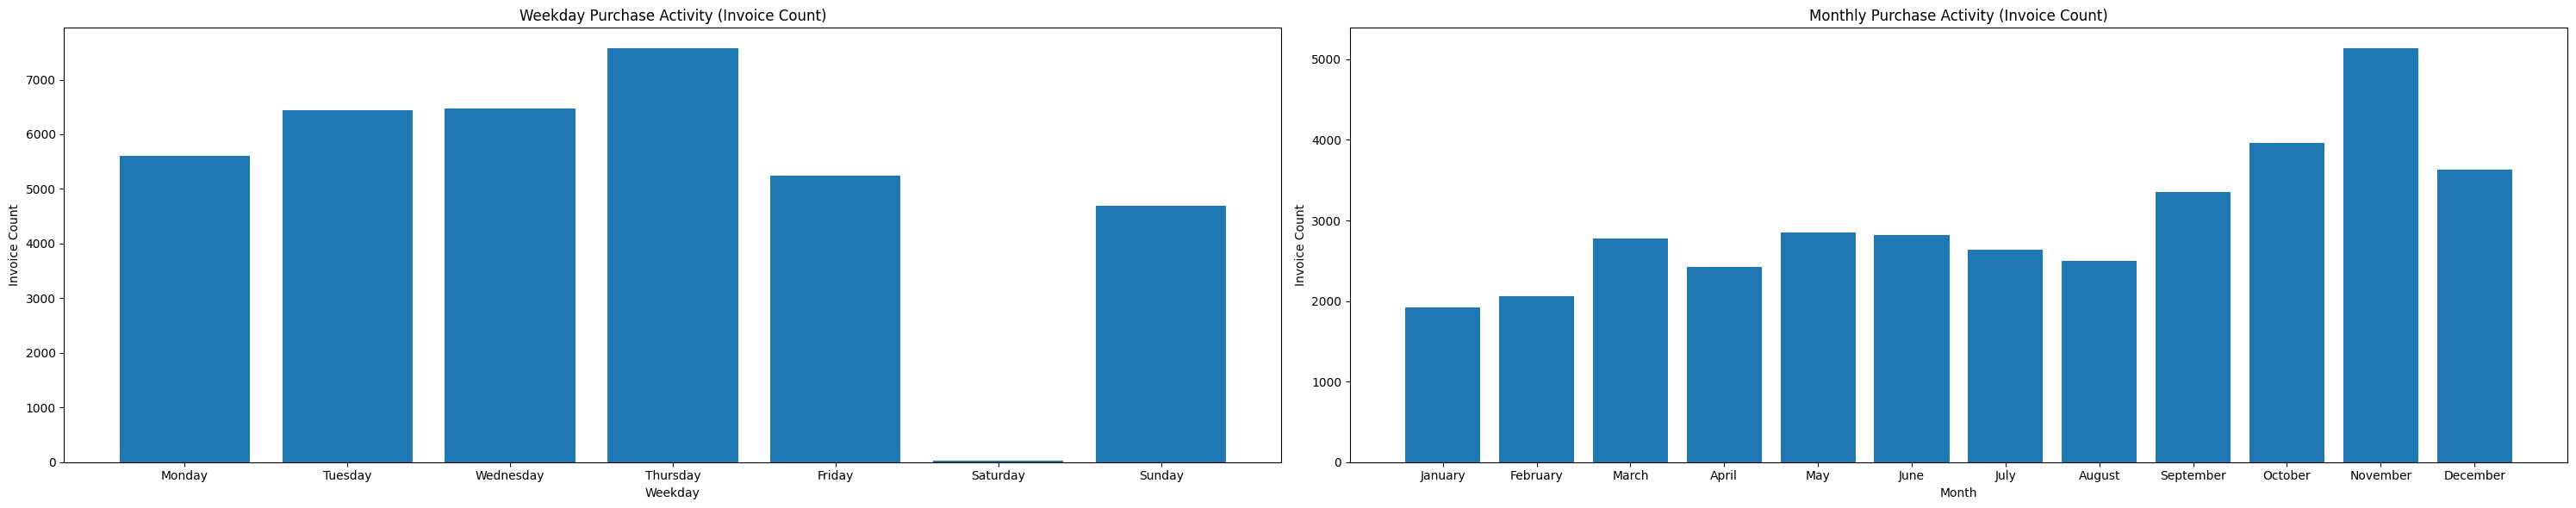

In [15]:
# Feature extraction
df.loc[:, "Week Day"] = df["InvoiceDate"].dt.day_name()
df.loc[:, "Month Name"] = df["InvoiceDate"].dt.month_name()

# ---------- WEEKDAY ----------
weekday_invoices = (
    df
    .groupby("Week Day")["Invoice"]
    .nunique()
    .reset_index(name="Invoice Count")
)

weekday_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

weekday_invoices["Week Day"] = pd.Categorical(
    weekday_invoices["Week Day"],
    categories=weekday_order,
    ordered=True
)

weekday_invoices = weekday_invoices.sort_values("Week Day")

# ---------- MONTH ----------
monthly_invoices = (
    df
    .groupby("Month Name")["Invoice"]
    .nunique()
    .reset_index(name="Invoice Count")
)

month_order = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

monthly_invoices["Month Name"] = pd.Categorical(
    monthly_invoices["Month Name"],
    categories=month_order,
    ordered=True
)

monthly_invoices = monthly_invoices.sort_values("Month Name")

# ---------- VISUAL ----------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 6))

ax1.bar(weekday_invoices["Week Day"], weekday_invoices["Invoice Count"])
ax1.set_title("Weekday Purchase Activity (Invoice Count)")
ax1.set_xlabel("Weekday")
ax1.set_ylabel("Invoice Count")

ax2.bar(monthly_invoices["Month Name"], monthly_invoices["Invoice Count"])
ax2.set_title("Monthly Purchase Activity (Invoice Count)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Invoice Count")

plt.tight_layout()
plt.show()


### Active Customers Over Time

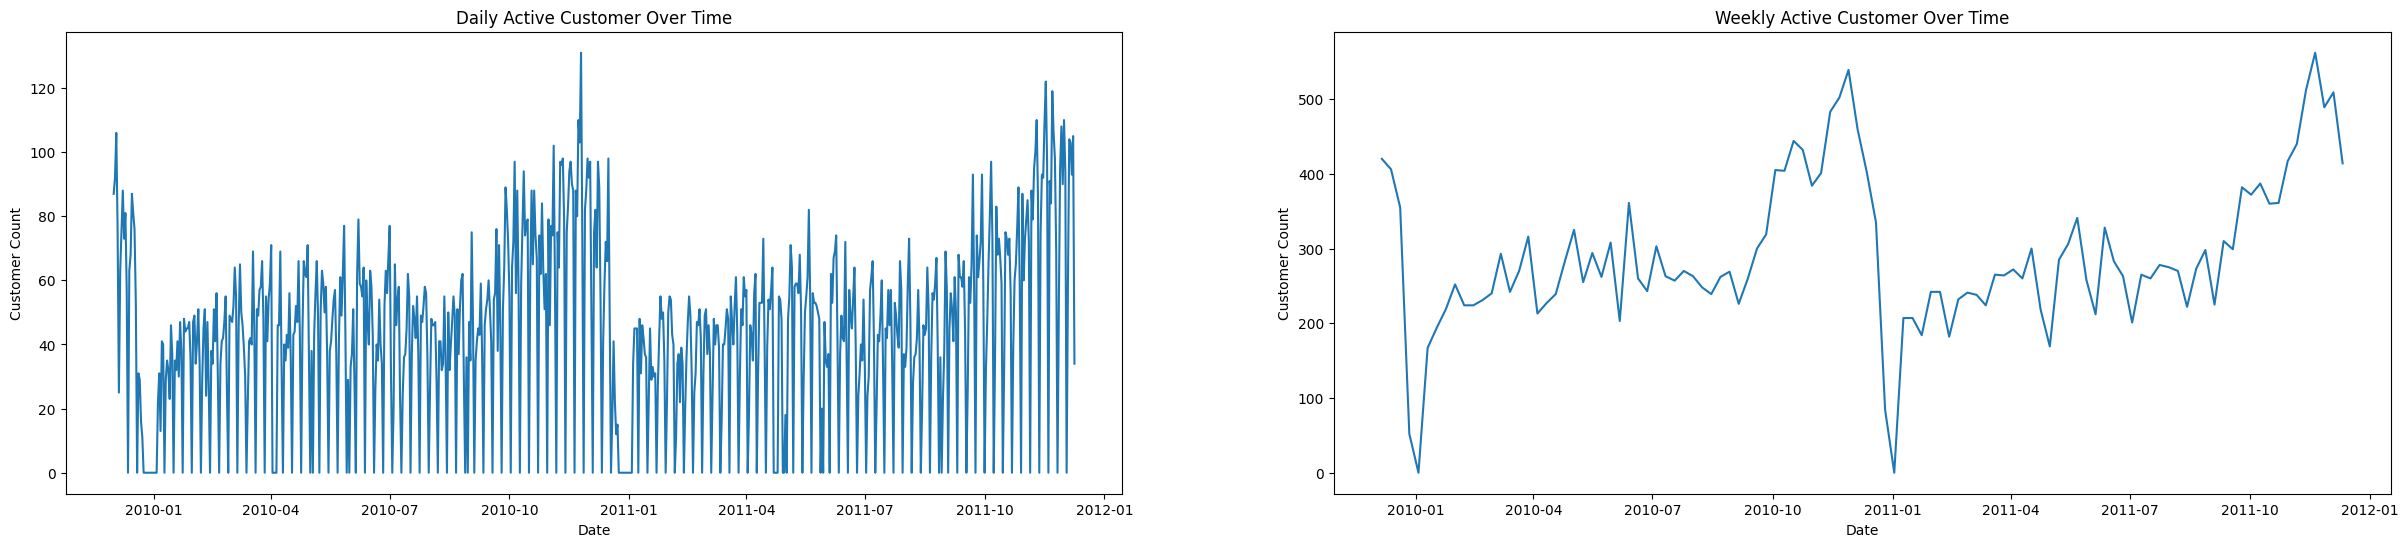

In [16]:
data_ts = df.set_index("InvoiceDate")

active_customers_daily = (
    data_ts
    .resample("D")["Customer ID"]
    .nunique()
    .reset_index()
)
active_customers_weekly = (
    data_ts
    .resample("W")["Customer ID"]
    .nunique()
    .reset_index()
)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(30, 6))

ax1.plot(active_customers_daily["InvoiceDate"], active_customers_daily["Customer ID"])
ax1.set_title("Daily Active Customer Over Time")
ax1.set_xlabel('Date')
ax1.set_ylabel('Customer Count')

ax2.plot(active_customers_weekly["InvoiceDate"], active_customers_weekly["Customer ID"])
ax2.set_title("Weekly Active Customer Over Time")
ax2.set_xlabel('Date')
ax2.set_ylabel('Customer Count')

plt.show()

### Rolling Average (Trend Smoothing)

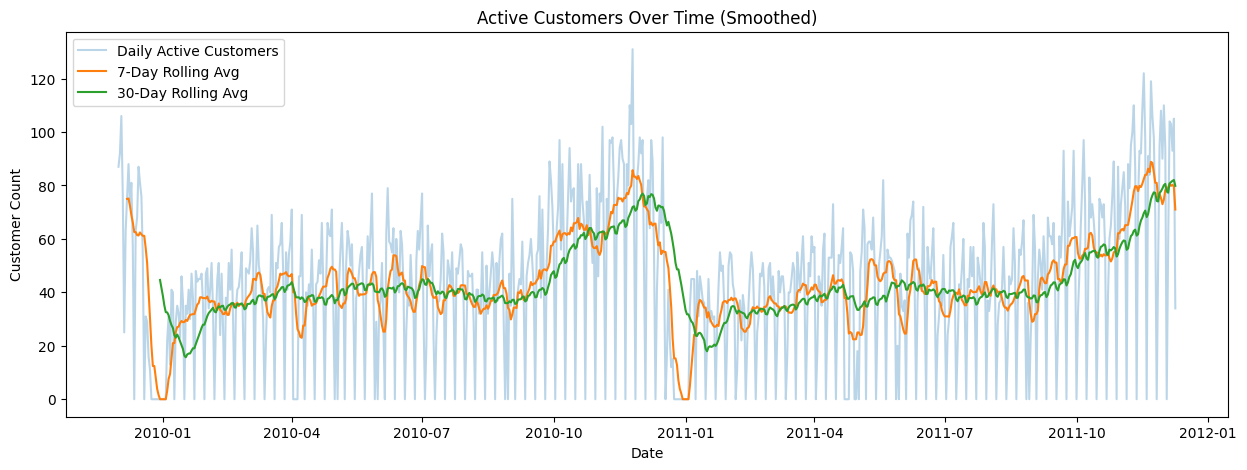

In [17]:
data_ts = df.set_index("InvoiceDate")

active_customers_daily = (
    data_ts
    .resample("D")["Customer ID"]
    .nunique()
    .reset_index()
)
active_customers_weekly = (
    data_ts
    .resample("W")["Customer ID"]
    .nunique()
    .reset_index()
)

active_customers_daily["Rolling_7D"] = active_customers_daily["Customer ID"].rolling(window=7).mean()

active_customers_daily["Rolling_30D"] = active_customers_daily["Customer ID"].rolling(window=30).mean()

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(
    active_customers_daily["InvoiceDate"],
    active_customers_daily["Customer ID"],
    alpha=0.3,
    label="Daily Active Customers"
)

ax.plot(
    active_customers_daily["InvoiceDate"],
    active_customers_daily["Rolling_7D"],
    label="7-Day Rolling Avg"
)

ax.plot(
    active_customers_daily["InvoiceDate"],
    active_customers_daily["Rolling_30D"],
    label="30-Day Rolling Avg"
)

ax.set_title("Active Customers Over Time (Smoothed)")
ax.set_xlabel("Date")
ax.set_ylabel("Customer Count")
ax.legend()

plt.show()